## Statistical Modeling
 - **Objective:**
 
   The goal is to perform statistical modeling on the dataset to predict key outcomes like TotalPremium and TotalClaims. 

In [1]:
# modifying the module search path to access python packges or modules
import os 
import sys
sys.path.insert(0, os.path.dirname(os.getcwd()))

#### Data directory

In [2]:
DATA_FILE_PATH = '../Data/MachineLearningRating_v3.txt'

In [3]:
# importing the required module and packages
from scripts import eda, modeling

d:\10Academy\W3_project\Insurance_solutions\w3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Loadind datasets

In [4]:
eda=eda.EDA(DATA_FILE_PATH)

In [5]:
# Reading data
df=eda.read_data()

# Displaying the top five data
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


### Data Preparation:

- Handling Missing Data:

    Impute or remove missing values, depending on their proportion and impact.

- Feature Engineering:

    Create new features relevant to the target variables: TotalPremium and TotalClaims.

- Encoding Categorical Data:

    Convert categorical variables to numerical format using techniques like one-hot encoding or label encoding.
     
- Train-Test Split:

    Split the dataset into a training set (70-80%) and a test set (20-30%) for model building and evaluation.

In [6]:
# Checking data quality
eda.assess_data_quality(df)


---- Missing Values ----
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
Nu

In [7]:
# cleaning data to handle missing values and data type format
cleaned_data=eda.clean_data(df)

cleaned_data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [8]:
# Data querlity after cleaning
eda.assess_data_quality(cleaned_data)


---- Missing Values ----
UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle    

In [9]:
cleaned_data.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [10]:
df_cat=cleaned_data.select_dtypes("object")

### Feature Engineering for Insurance Dataset
In order to deliver the best predictive performance for machine learning models, we need to apply feature engineering techniques.
  
***The main goals are to:-***

  - Select relevant features for the model.

  - Transform features into the appropriate format for machine learning.

  - Create new features that might improve predictive power.

In [11]:
feature_engineering=modeling.Model(cleaned_data)


In [12]:
# Dropping Irrelevant Columns that don’t contribute to the predictive power
df_drop=feature_engineering.droping_inrrelevant()

In [13]:
# Date Feature Engineering
data_feature=feature_engineering.useful_informationExtraction(df_drop)

In [14]:
data_feature.head()

,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Bank,AccountType,MaritalStatus,Gender,Province,...,TermFrequency,CalculatedPremiumPerTerm,CoverGroup,Section,Product,TotalPremium,TotalClaims,Transaction_Year,Transaction_Month,VehicleAge
0,2015-03-01,True,,Close Corporation,Mr,First National Bank,Current account,Not specified,Not specified,Gauteng,...,Monthly,25.0000,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,21.929825,0.0,2015,3,NaN
1,2015-05-01,True,,Close Corporation,Mr,First National Bank,Current account,Not specified,Not specified,Gauteng,...,Monthly,25.0000,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,21.929825,0.0,2015,5,NaN
2,2015-07-01,True,,Close Corporation,Mr,First National Bank,Current account,Not specified,Not specified,Gauteng,...,Monthly,25.0000,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.000000,0.0,2015,7,NaN
3,2015-05-01,True,,Close Corporation,Mr,First National Bank,Current account,Not specified,Not specified,Gauteng,...,Monthly,584.6468,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,512.848070,0.0,2015,5,NaN
4,2015-07-01,True,,Close Corporation,Mr,First National Bank,Current account,Not specified,Not specified,Gauteng,...,Monthly,584.6468,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.000000,0.0,2015,7,NaN


In [15]:
clead_featureData=eda.clean_data(data_feature)

In [16]:
eda.assess_data_quality(clead_featureData)


---- Missing Values ----
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Province                    0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
NumberOfDoors               0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle                  0
SumInsured                  0
TermFrequency               0
CalculatedPremiumPerTerm    0
CoverGroup                  0
Section                     0
Product                     0
TotalPremium                0
TotalClaims                 0
Transaction_Year            0
Transaction_Month           0
dtype: int64



In [17]:
clead_featureData.head()

,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Bank,AccountType,MaritalStatus,Gender,Province,...,SumInsured,TermFrequency,CalculatedPremiumPerTerm,CoverGroup,Section,Product,TotalPremium,TotalClaims,Transaction_Year,Transaction_Month
0,2015-03-01,True,,Close Corporation,Mr,First National Bank,Current account,Not specified,Not specified,Gauteng,...,0.01,Monthly,25.0000,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,21.929825,0.0,2015,3
1,2015-05-01,True,,Close Corporation,Mr,First National Bank,Current account,Not specified,Not specified,Gauteng,...,0.01,Monthly,25.0000,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,21.929825,0.0,2015,5
2,2015-07-01,True,,Close Corporation,Mr,First National Bank,Current account,Not specified,Not specified,Gauteng,...,0.01,Monthly,25.0000,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.000000,0.0,2015,7
3,2015-05-01,True,,Close Corporation,Mr,First National Bank,Current account,Not specified,Not specified,Gauteng,...,119300.00,Monthly,584.6468,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,512.848070,0.0,2015,5
4,2015-07-01,True,,Close Corporation,Mr,First National Bank,Current account,Not specified,Not specified,Gauteng,...,119300.00,Monthly,584.6468,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.000000,0.0,2015,7


In [18]:
encodedData=feature_engineering.categoricalEndcoding(clead_featureData)

In [19]:
eda.assess_data_quality(encodedData)


---- Missing Values ----
TransactionMonth                                           0
IsVATRegistered                                            0
RegistrationYear                                           0
make                                                       0
Model                                                      0
                                                          ..
Section_Standalone passenger liability                     0
Section_Third party or third party, fire and theft only    0
Product_Mobility Commercial Cover: Monthly                 0
Product_Mobility Metered Taxis: Monthly                    0
Product_Standalone Passenger Liability                     0
Length: 80, dtype: int64

---- Duplicates ----
Number of duplicate rows: 165


In [20]:
clean_encodedData=eda.clean_data(encodedData)

In [21]:
eda.assess_data_quality(clean_encodedData)


---- Missing Values ----
TransactionMonth                                           0
IsVATRegistered                                            0
RegistrationYear                                           0
make                                                       0
Model                                                      0
                                                          ..
Section_Standalone passenger liability                     0
Section_Third party or third party, fire and theft only    0
Product_Mobility Commercial Cover: Monthly                 0
Product_Mobility Metered Taxis: Monthly                    0
Product_Standalone Passenger Liability                     0
Length: 80, dtype: int64

---- Duplicates ----
Number of duplicate rows: 0


#### Feature Scaling
   Some numerical features, especially ones like TotalPremium, TotalClaims, and SumInsured, 

   may require scaling to ensure they are properly weighted.

In [22]:
Scaled_data=feature_engineering.feature_scaling(clean_encodedData)

#### Feature Selection and Modeling
After feature engineering, applying feature selection techniques such as Recursive Feature Elimination (RFE), 

Feature Importance using Random Forest, or Lasso Regularization. Here, demonstrating the use of RFE.

In [23]:
Scaled_data.head()

,IsVATRegistered,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CapitalOutstanding,SumInsured,...,CoverGroup_Standalone passenger liability,CoverGroup_Third Party Only,CoverGroup_Trailer,Section_Motor Comprehensive,Section_Optional Extended Covers,Section_Standalone passenger liability,"Section_Third party or third party, fire and theft only",Product_Mobility Commercial Cover: Monthly,Product_Mobility Metered Taxis: Monthly,Product_Standalone Passenger Liability
0,1,2004,28,178,6.0,0.290543,1.666963,4.0,0.523604,-0.436895,...,0,0,0,1,0,0,0,0,1,0
1,1,2004,28,178,6.0,0.290543,1.666963,4.0,0.523604,-0.436895,...,0,0,0,1,0,0,0,0,1,0
2,1,2004,28,178,6.0,0.290543,1.666963,4.0,0.523604,-0.436895,...,0,0,0,1,0,0,0,0,1,0
3,1,2004,28,178,6.0,0.290543,1.666963,4.0,0.523604,-0.362116,...,0,0,0,1,0,0,0,0,1,0
4,1,2004,28,178,6.0,0.290543,1.666963,4.0,0.523604,-0.362116,...,0,0,0,1,0,0,0,0,1,0


In [24]:
X_train, X_test, y_train, y_test =feature_engineering.Data_spliting(Scaled_data)

In [25]:
selected_features, X_train_selected, X_test_selected=feature_engineering.feature_selection(X_train, y_train,X_test)

Selected Features:  Index(['RegistrationYear', 'Model', 'CapitalOutstanding', 'SumInsured',
       'CalculatedPremiumPerTerm', 'TotalPremium', 'Transaction_Month',
       'Bank_Capitec Bank', 'AccountType_Savings account',
       'TrackingDevice_Yes'],
      dtype='object')


### Model Training and Evaluation

Data preparation and feature engineering, have successfully completed 

Next critical phase of model training and evaluation.

#### ***Model Training***

Implement three models:

- Linear Regression

- Random Forest

- XGBoost

For each of these models, using the engineered features and evaluate their performance using appropriate regression metrics like Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE).

In [26]:
lr_model,rmse_lr, mae_lr=feature_engineering.linearRegression(X_train_selected,y_train, X_test_selected, y_test)

Linear Regression RMSE: 0.7084687584802927
Linear Regression MAE: 0.07569152508929175


In [27]:
rf_model,rmse_rf, mae_rf=feature_engineering.random_forest(X_train_selected,y_train, X_test_selected, y_test)

Random Forest RMSE: 0.9428306751637927
Random Forest MAE: 0.07588609720109715


In [28]:
xgb_model,rmse_xgb, mae_xgb=feature_engineering.xgboost(X_train_selected,y_train, X_test_selected, y_test)

XGBoost RMSE: 0.8864493641581083
XGBoost MAE: 0.07243535750389073


### Model Performance Comparison

Now comparing the three models using RMSE and MAE as the evaluation metrics. 

The model with the lowest RMSE and MAE will generally be preferred, but interpretability and complexity of the model should also be considered.

In [29]:
feature_engineering.model_comparesion(rmse_lr, rmse_rf,rmse_xgb, mae_lr, mae_rf,mae_xgb)

               Model      RMSE       MAE
0  Linear Regression  0.708469  0.075692
1      Random Forest  0.942831  0.075886
2            XGBoost  0.886449  0.072435


### Hyperparameter Tuning

To improve model performance further, 

Fine-tuning the hyperparameters of Random Forest and XGBoost using GridSearchCV or RandomizedSearchCV.

In [30]:
## Random Forest Hyperparameter Tuning
best_rf_model=feature_engineering.besf_randomForest(rf_model,X_train_selected,y_train, X_test_selected, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  13.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  13.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  13.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  13.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  13.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  26.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  26.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  26.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  28.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  27.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=  42.3s
[CV] END max_depth=10, min_samples_split=2, n_e

In [31]:
##XGBoost Hyperparameter Tuning
best_xg_model=feature_engineering.best_xgboost(xgb_model,X_train_selected,y_train, X_test_selected, y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_es

#### Model Interpretation with SHAP
To explain the output of complex models (like Random Forest or XGBoost), 

using SHAP values to understand how individual features influence predictions.

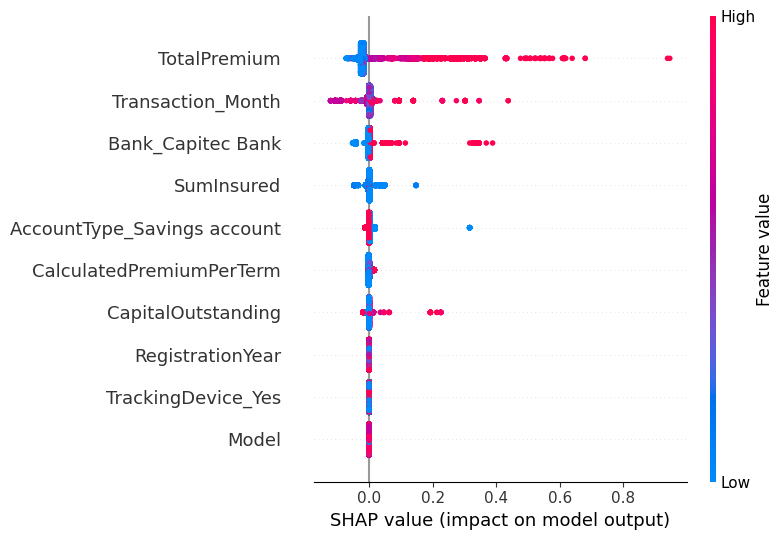

In [32]:
feature_engineering.shap_explanier(best_xg_model, X_test_selected)

## SHAP Value Analysis - Conclusion

The SHAP plot provides insights into the features that significantly influence the model's predictions.

- **TotalPremium**: Has the largest impact on the model's output. Higher premium values lead to higher predictions.

- **Transaction_Month**: Seasonality in transactions affects the model, indicating temporal dependencies in premium or claims.

- **Bank (Capitec Bank)** and **AccountType (Savings account)**: These financial features show significant importance, likely affecting 
customer risk profiles.

- **SumInsured** and **CalculatedPremiumPerTerm**: These are core insurance variables that directly influence premium and claims predictions.

- **CapitalOutstanding** and **TrackingDevice_Yes**: These security and loan-related variables slightly affect the model, contributing to risk evaluation.

Overall, financial and vehicle-related variables play a critical role in determining insurance outcomes, with the premium being the most influential factor.
